<a href="https://colab.research.google.com/github/naga8199/CMPE257-Fall23-NagaLakshmi-Nagubandi/blob/homework-1/257_Task3_Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 3**

In [28]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Generates N random points for a given linear separator w
# if wTx > 0, y = 1; if wTx < 0, y = -1. wTx = 0 are discarded
def generate_pla(N=20, w0=0, w1=1, w2=1):
    n = 0
    X1 = []
    X2 = []
    Y = []
    while n < N:
        x1 = random.uniform(-10, 10)
        x2 = random.uniform(-10, 10)
        y_step = w0 + w1 * x1 + w2 * x2
        if y_step == 0:
            continue
        X1.append(x1)
        X2.append(x2)
        if y_step > 0:
            Y.append(1)
        elif y_step < 0:
            Y.append(-1)
        n += 1
    data = [np.array([1, X1[i], X2[i], Y[i]]) for i in range(N)]
    return data

In [29]:
# Perceptron Learning Algorithm
def perceptron_learning(data, max_updates=1000, eta=100):
    w = np.zeros(3)  # Initialize weights
    for _ in range(max_updates):
        # Randomly pick a data point
        point = random.choice(data)
        x = point[:3]
        y = point[-1]

        # Compute the signal
        s = np.dot(w, x)

        # Update the weights if needed
        if y * s <= 1:
            w = w + eta * y * x
        # Check for convergence (no misclassifications)
        misclassified = False
        for point in data:
            x = point[:3]
            y = point[-1]
            s = np.dot(w, x)
            if y * s <= 0:
                misclassified = True
                break
        if not misclassified:
            break
    return w

In [30]:
# Generate training data and run the PLA
f_w0, f_w1, f_w2 = 1, 1, 1
N = 100
training_data = generate_pla(N, f_w0, f_w1, f_w2)

In [31]:
# Generate test data (similar process as training data generation)
N_test=10000
test_data = generate_pla(N_test, f_w0, f_w1, f_w2)

In [32]:
def Plotting_error(final_weights):
  data_train = np.array(training_data)
  plt.scatter(data_train[data_train[:, 3] == 1][:, 1], data_train[data_train[:, 3] == 1][:, 2], color='b', label='Positive')
  plt.scatter(data_train[data_train[:, 3] == -1][:, 1], data_train[data_train[:, 3] == -1][:, 2], color='r', label='Negative')
  plt.xlabel('X1')
  plt.ylabel('X2')

# Plot the target function f and hypothesis g
  x_vals = np.linspace(-10, 10, 100)
  plt.plot(x_vals, -(final_weights[0] + final_weights[1] * x_vals) / final_weights[2], 'orange', label='Final Hypothesis g')
  plt.plot(x_vals, -f_w1/f_w2*x_vals - f_w0/f_w2, '-y', label='Target function f')
  plt.legend()
  plt.title('Perceptron Learning Algorithm')
  plt.show()

# Calculate error on the test set
  data_test = np.array(test_data)
  test_error = np.mean(data_test[:, 3] != np.sign(np.dot(data_test[:, :3], final_weights)))
  return test_error

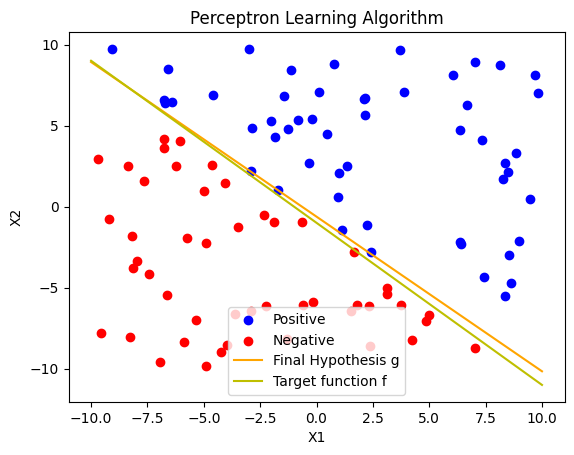

Test_Error: 0.0203


In [33]:
final_weights = perceptron_learning(training_data, max_updates=1000, eta=100)
error=Plotting_error(final_weights)
print(f"Test_Error: {error}")

eta=1


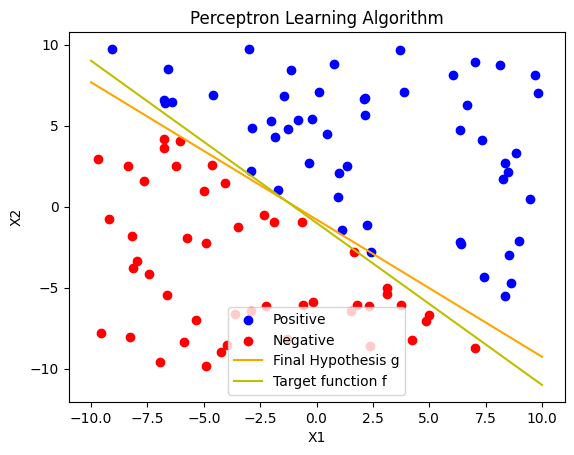

Test_Error: 0.0391


In [34]:
final_weights = perceptron_learning(training_data, max_updates=1000, eta=1)
error=Plotting_error(final_weights)
print(f"Test_Error: {error}")

eta=0.01

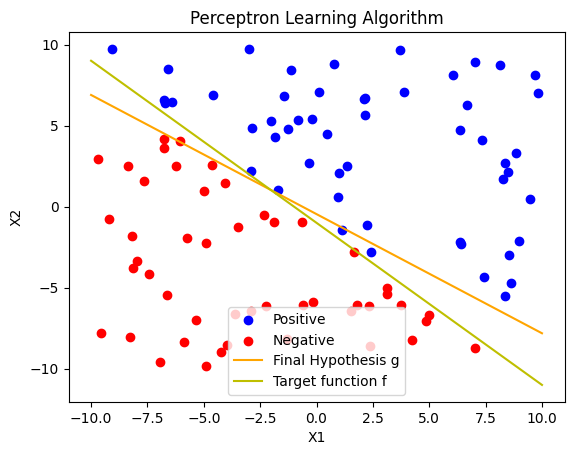

Test_Error: 0.0688


In [35]:
final_weights = perceptron_learning(training_data, max_updates=1000, eta=0.01)
error=Plotting_error(final_weights)
print(f"Test_Error: {error}")

eta=0.0001

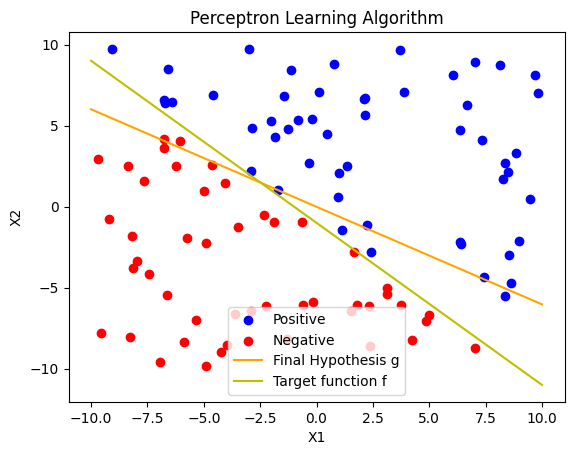

Test_Error: 0.106


In [36]:
final_weights = perceptron_learning(training_data, max_updates=1000, eta=0.0001)
error=Plotting_error(final_weights)
print(f"Test_Error: {error}")

A higher eta can lead to faster convergence, as the weight updates are more substantial and a lower eta may lead to slower convergence, as the weight updates are smaller.

**Task 4**

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def read_data(file_path):

# Initialize empty lists to store labels and image data
  labels = []
  images = []

# Open and read the file
  with open(file_path, 'r') as file:
    for line in file:

      # Split each line into values based on whitespace
      values = line.strip().split()

      # The first value is the label, and the rest are image data
      label = float(values[0])
      image_data = [float(x) for x in values[1:]]

      # Append label and image data to their respective lists
      labels.append(label)
      images.append(image_data)

# Create a DataFrame with labels as the first column
      df = pd.DataFrame({'Label': labels})

# Add the image data columns to the DataFrame
    for i in range(len(images[0])):
      df[i+1] = [row[i] for row in images]

    return df

In [39]:
df_train=read_data("/content/ZipDigits (1).train")
df_test=read_data("/content/ZipDigits.test")

In [40]:
df_train

,Label,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7286,3.0,-1.0,-1.0,-1.0,-0.988,-0.527,-0.208,0.620,1.000,0.467,...,-0.116,0.899,0.416,-0.510,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
7287,3.0,-1.0,-1.0,-1.0,-0.990,0.708,0.557,0.347,-0.107,-0.758,...,0.697,0.636,0.167,-0.968,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
7288,3.0,-1.0,-1.0,-1.0,-0.783,-0.984,-0.827,0.068,1.000,1.000,...,0.805,1.000,1.000,0.727,-0.342,-0.933,-1.000,-1.000,-1.000,-1.0
7289,0.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.549,0.463,0.999,0.999,...,-0.231,0.621,0.999,-0.042,-0.231,-0.687,-1.000,-1.000,-1.000,-1.0


In [41]:
df_test

,Label,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,9.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.948,-0.561,0.148,0.384,...,-1.000,-0.908,0.430,0.622,-0.973,-1.000,-1.0,-1.0,-1.0,-1.0
1,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
2,3.0,-1.0,-1.0,-1.0,-0.593,0.700,1.000,1.000,1.000,1.000,...,1.000,0.717,0.333,0.162,-0.393,-1.000,-1.0,-1.0,-1.0,-1.0
3,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
4,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.858,-0.106,...,0.901,0.901,0.901,0.290,-0.369,-0.867,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.417,0.814,1.000,0.775,...,1.000,1.000,0.554,0.184,-0.484,-1.000,-1.0,-1.0,-1.0,-1.0
2003,9.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.855,0.209,0.941,...,-1.000,0.319,1.000,0.056,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
2004,4.0,-1.0,-1.0,-1.0,-1.000,-0.031,0.752,-0.431,-1.000,-1.000,...,1.000,0.928,-0.393,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
2005,0.0,-1.0,-1.0,-1.0,-1.000,-0.534,0.578,1.000,0.301,-0.328,...,1.000,0.430,0.200,-0.061,-0.975,-1.000,-1.0,-1.0,-1.0,-1.0


Preprocessing on Training Dataset

In [42]:
# Filter the dataset to include only digits labeled as ‘1’ and ‘5’
df = df_train[(df_train['Label'] == 1) | (df_train['Label'] == 5)]

In [43]:
# Convert the labels into labels for binary classification, i.e., ‘1’ and ‘-1’
df['Label'] = df['Label'].apply(lambda x: 1 if x == 1 else -1)

In [44]:
# Extract intensity and symmetry features
# Intensity is simply the mean of the pixel values
df['intensity'] = df.iloc[:, 1:].mean(axis=1)

In [45]:
# Symmetry is calculated as the negative absolute difference between a pixel and its horizontally mirrored counterpart
pixels = df.iloc[:, 1:257].values.reshape(-1, 16, 16)
df['symmetry'] = -np.abs(pixels - np.flip(pixels, axis=2)).mean(axis=(1, 2))

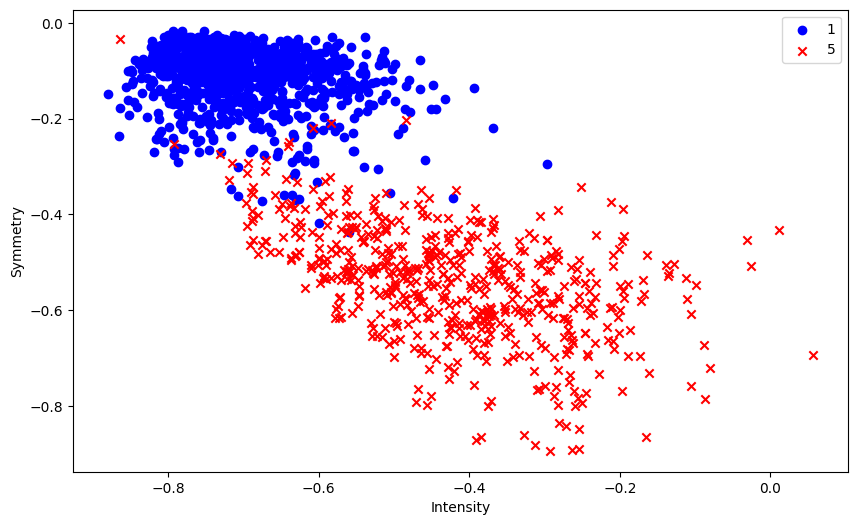

In [46]:
# Plot a 2D scatter plot with the two features extracted
plt.figure(figsize=(10, 6))
plt.scatter(df[df['Label'] == 1]['intensity'], df[df['Label'] == 1]['symmetry'], color='b', marker='o', label='1')
plt.scatter(df[df['Label'] == -1]['intensity'], df[df['Label'] == -1]['symmetry'], color='r', marker='x', label='5')
plt.xlabel('Intensity')
plt.ylabel('Symmetry')
plt.legend()
plt.show()


In [47]:
df

,Label,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,intensity,symmetry
1,-1,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0,-0.111738,-0.533727
7,1,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,0.510,-0.213,...,0.301,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-0.753914,-0.117438
9,1,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.909,0.801,...,0.735,0.380,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-0.772281,-0.162297
12,1,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.998,0.613,-0.385,...,0.159,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-0.769258,-0.059500
13,1,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,0.457,-0.219,...,0.804,-0.953,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-0.795437,-0.050906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7269,-1,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-0.289414,-0.585203
7271,-1,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.937,-0.333,...,0.154,-0.763,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-0.534238,-0.513789
7284,1,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.204,1.000,...,1.000,0.274,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-0.609793,-0.216383
7285,1,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.744,0.788,0.113,...,0.786,-0.748,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-0.662309,-0.092820


Pre-Processing on Testing Dataset

In [48]:
# Filter the dataset to include only digits labeled as ‘1’ and ‘5’
df1 = df_test[(df_test['Label'] == 1) | (df_test['Label'] == 5)]

In [49]:
# Convert the labels into labels for binary classification, i.e., ‘1’ and ‘-1’
df1['Label'] = df1['Label'].apply(lambda x: 1 if x == 1 else -1)

In [50]:
# Extract intensity and symmetry features
# Intensity is simply the mean of the pixel values
df1['intensity'] = df1.iloc[:, 1:].mean(axis=1)

In [51]:
# Symmetry is calculated as the negative absolute difference between a pixel and its horizontally mirrored counterpart
pixels = df1.iloc[:, 1:257].values.reshape(-1, 16, 16)
df1['symmetry'] = -np.abs(pixels - np.flip(pixels, axis=2)).mean(axis=(1, 2))

In [52]:
df1

,Label,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,intensity,symmetry
16,1,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.586,0.693,1.000,...,0.592,0.219,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-0.680133,-0.312062
32,-1,-1.0,-1.0,-1.0,-1.000,-0.933,0.461,0.779,0.584,0.584,...,0.371,-0.397,-0.949,-1.000,-1.000,-1.000,-1.000,-1.0,-0.350320,-0.765688
36,-1,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-0.497641,-0.392437
42,1,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,0.561,-0.264,...,0.729,-0.916,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-0.750781,-0.085938
45,1,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,0.219,0.787,-0.333,...,0.935,0.396,-0.931,-1.000,-1.000,-1.000,-1.000,-1.0,-0.561766,-0.116406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,-1,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,0.633,0.541,0.418,0.259,-0.625,-0.746,-0.883,-1.0,-0.108152,-0.691961
1989,1,-1.0,-1.0,-1.0,-1.000,-1.000,-0.999,0.562,0.757,-0.589,...,0.291,-0.996,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-0.645996,-0.159617
1992,-1,-1.0,-1.0,-1.0,-1.000,-1.000,-0.565,0.388,1.000,1.000,...,0.383,1.000,1.000,0.970,0.207,0.045,-0.967,-1.0,-0.230039,-0.575469
1998,-1,-1.0,-1.0,-1.0,-0.885,-0.280,-0.411,-0.920,-0.920,-0.920,...,1.000,1.000,0.868,-0.400,-0.998,-1.000,-1.000,-1.0,-0.320828,-0.539484



**REFERENCES**
I have used the provided code for generating data for Task 3 and  I have referred stack overflow for errors and doubts.